# Exercice sur le taux de chômage aux Etats-Unis

## Importation et visualisation des données

On importe les données trimestrielles du taux de chômage aux Etats-Unis du 01/01/1994 au 23/01/01 (117 observations). Les données sont importées du site db.nomics. Les données proviennent du ``Bureau of Labor Statistics''. On leur importe en utilisant leur identifiant ids.


Installation des packages

In [18]:
#install packages
#install.packages("data.table")
#install.packages('ggplot2')
#install.packages('urca')
#sessionInfo()
#install.packages("https://git.nomics.world/dbnomics/rdbnomics")
#remotes::install_github("dbnomics/rdbnomics", build_vignettes = TRUE, force = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(data.table)
library(rdbnomics)

df<-rdb(ids = "BLS/ln/LNS13327708Q")
class(df)
str(df)

Visit <https://db.nomics.world>.



[1] "data.table" "data.frame"

Classes ‘data.table’ and 'data.frame':	117 obs. of  79 variables:
 $ @frequency     : chr  "quarterly" "quarterly" "quarterly" "quarterly" ...
 $ absn           : chr  "0" "0" "0" "0" ...
 $ Absn           : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ activity       : chr  "0" "0" "0" "0" ...
 $ Activity       : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ ages           : chr  "00" "00" "00" "00" ...
 $ Ages           : chr  "16 years and over" "16 years and over" "16 years and over" "16 years and over" ...
 $ born           : chr  "00" "00" "00" "00" ...
 $ Born           : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ cert           : chr  "00" "00" "00" "00" ...
 $ Cert           : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ chld           : chr  "00" "00" "00" "00" ...
 $ Chld           : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ class          : chr  "00" "00" "00" "00" ...
 $ Class          : chr  "N/A" "N/A" "N/A" "N/A" ...
 $ dataset_code   : chr  "ln" "ln" "ln" "ln" ...
 $ dataset_name   : chr  "Labor Force Statisti

On crée un dataframe contenant uniquement les dates et la série du taux de chômage.

In [11]:
df_us<-df[,c("period","value")]
colnames(df_us)<-c('Date','taux')

In [12]:
head(df_us)

Date,taux
<date>,<dbl>
1994-01-01,7.9
1994-04-01,7.4
1994-07-01,7.3
1994-10-01,6.8
1995-01-01,6.6
1995-04-01,6.8


In [ ]:
tail(df_us)

Le graphique montre que le taux de chômage aux Etats-Unis fluctue autour de 6\% du début de l'échantillon jusqu'à l'année 2008 à partir de laquelle il augmente très rapidement jusqu'au niveau de 11\%, sous l'effet de la crise des subprimes. On observe aussi l'épisode de la crise du Covid avec une hausse instantanée du taux de chômage autour de 14\% suivie d'un retour rapide à des niveaux très bas. La période du covid peut avoir un impact sur les résultats des tests statistiques. Au vu du graphique, il est assez difficile de trancher sur la stationnarité du taux de chômage.

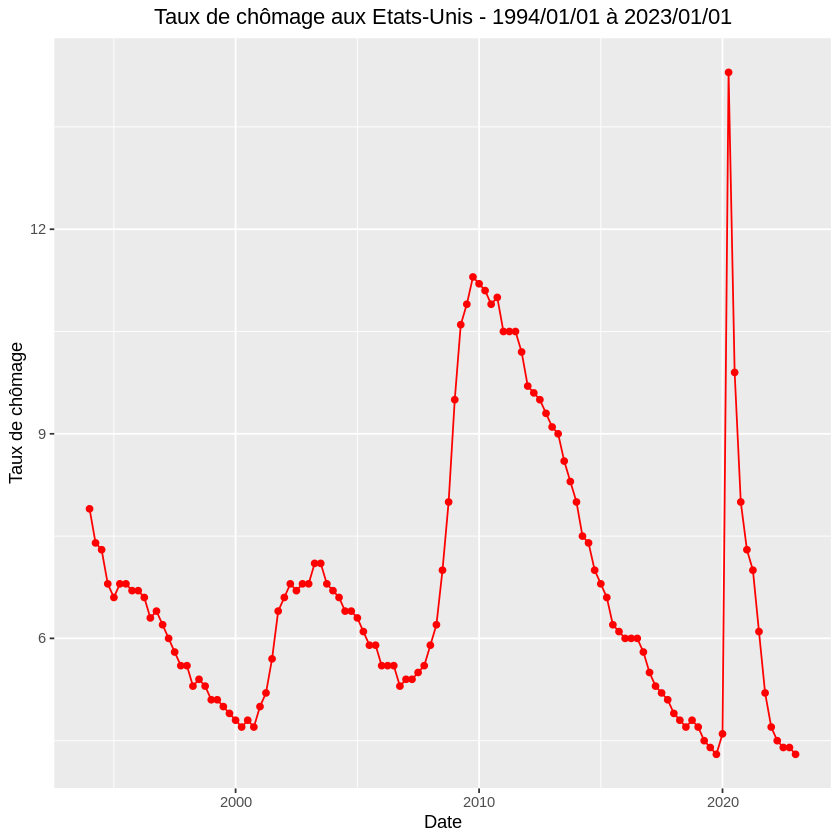

In [14]:
library(ggplot2)
p_us<-ggplot(data=df_us,aes(x=Date,y=taux))+geom_point(color='red')+geom_line(color='red')+xlab('Date')+ylab('Taux de chômage')+ggtitle('Taux de chômage aux Etats-Unis - 1994/01/01 à 2023/01/01')+theme(plot.title = element_text(hjust = 0.5))
p_us

## Autocorrélogramme du taux de chômage

, , 1

             [,1]
 [1,]  1.00000000
 [2,]  0.84904577
 [3,]  0.74684138
 [4,]  0.66584101
 [5,]  0.58513536
 [6,]  0.49606779
 [7,]  0.41251935
 [8,]  0.34014101
 [9,]  0.28180660
[10,]  0.23029826
[11,]  0.18742492
[12,]  0.15488136
[13,]  0.15015387
[14,]  0.09928688
[15,]  0.05350286
[16,]  0.01151688
[17,] -0.03063198
[18,] -0.07005654
[19,] -0.10401952
[20,] -0.13388956
[21,] -0.15293312

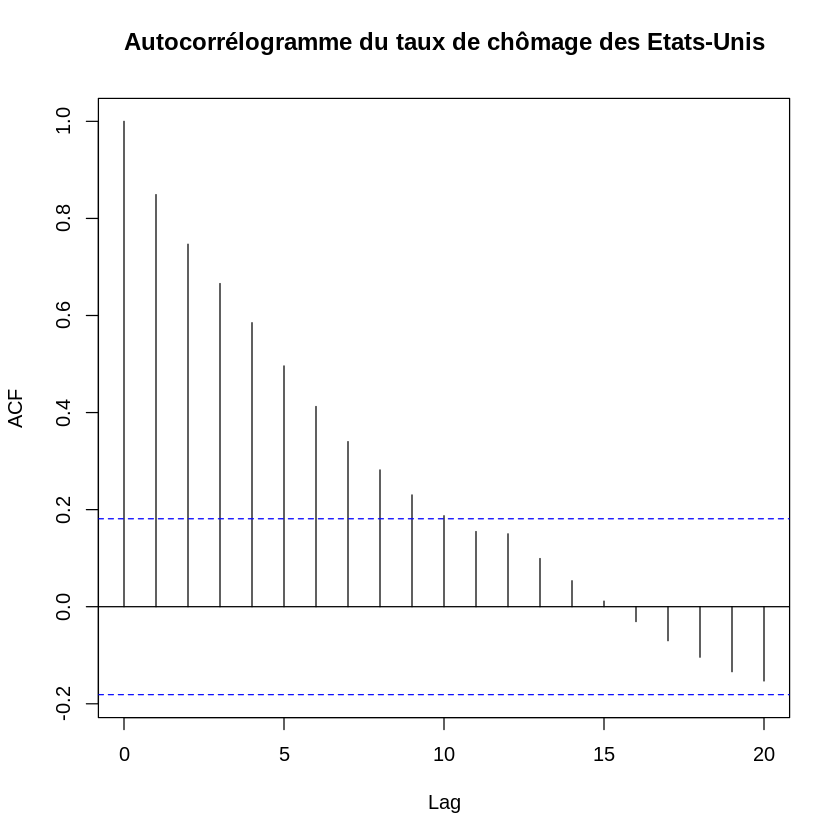

In [15]:
acf_us_rate<-acf(x=df_us$taux,main='Autocorrélogramme du taux de chômage des Etats-Unis')
acf_us_rate$acf

On observe que l'autocorrélation est supérieure à 0.5 jusqu'à l'ordre 4, ce qui est plutôt élevé. Elle n'est plus significative, pour un risque de première espèce de 5%, à partir de l'ordre 11. L'autocorrélogramme du taux de chômage serait compatible avec celui d'un processus stationnaire.

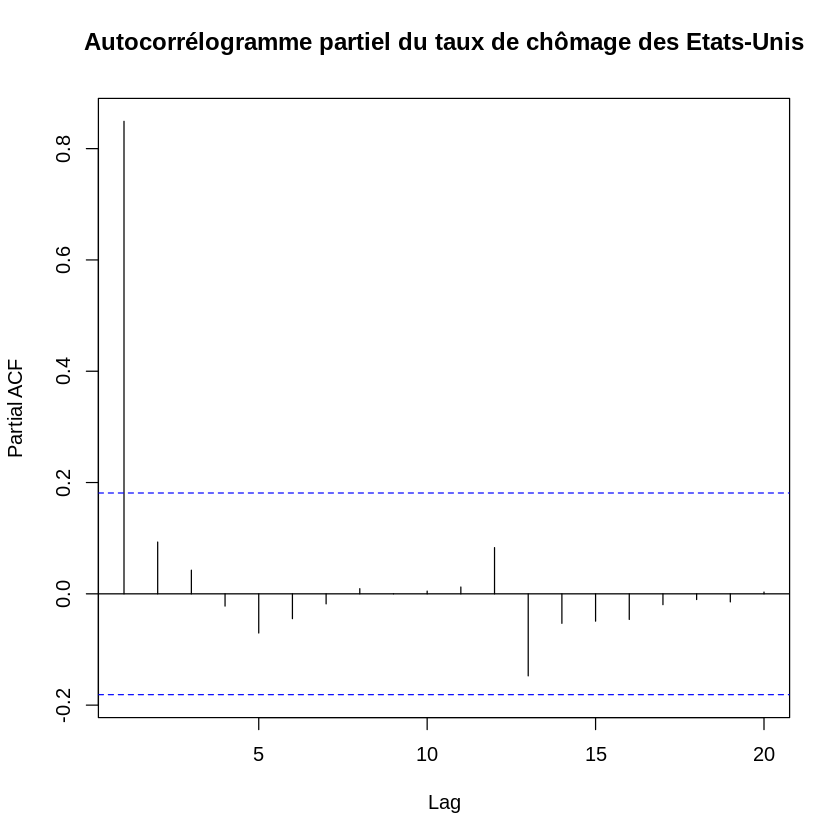

In [16]:
pacf(x=df_us$taux,main='Autocorrélogramme partiel du taux de chômage des Etats-Unis')

Aucune autocorrélation partielle n'est significativement différente de 0. L'autocorrélogramme et l'autocorrélogramme partiel nous suggère que le taux de chômage pourrait être modélisé par un processus AR(p).


# Test de Dickey-Fuller augmenté

## Test ADF avec constante et tendance déterministe
On applique le test ADF avec une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

In [19]:
library(urca)
adf1<-ur.df(y = df_us$taux,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4270 -0.3131 -0.1299  0.0887  9.5172 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.8277078  0.4057347   2.040   0.0439 *
z.lag.1     -0.1216237  0.0532682  -2.283   0.0245 *
tt          -0.0005169  0.0033362  -0.155   0.8772  
z.diff.lag  -0.1037807  0.0984491  -1.054   0.2943  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 104 degrees of freedom
Multiple R-squared:  0.07586,	Adjusted R-squared:  0.0492 
F-statistic: 2.846 on 3 and 104 DF,  p-value: 0.04123


Value of test-statistic is: -2.2832 1.8245 2.7056 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75 

La statistique du test ADF est égale à $t_{ADF}=-2.283$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1\%, 5\% et 10\%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la tendance déterministe est égal à $t_{\hat{b}} = -0.155$. Le seuil de rejet qui figurent la table de $t_{\hat{b}}$ est égal à 3.14 pour un risque de première espèce de 5\%. on a donc $\vert t_{\hat{b}} \vert = 0.155 <3.14$ : on ne peut pas rejeter l'hypothèse nulle que la tendance déterministe n'est pas significative.

## Test ADF avec constante

In [20]:
adf2<-ur.df(y = df_us$taux,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4520 -0.3038 -0.1329  0.1018  9.4926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.80241    0.36969   2.170   0.0322 *
z.lag.1     -0.12266    0.05260  -2.332   0.0216 *
z.diff.lag  -0.10272    0.09775  -1.051   0.2958  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.067 on 105 degrees of freedom
Multiple R-squared:  0.07565,	Adjusted R-squared:  0.05804 
F-statistic: 4.297 on 2 and 105 DF,  p-value: 0.01609


Value of test-statistic is: -2.3319 2.7504 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


La statistique du test ADF est égale à $t_{ADF}=-2.332$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1\%, 5\% et 10\%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la constante est égal à $t_{\hat{c}} = 2.170$. Le seuil de rejet de la table de $t_{\hat{c}}$ est égal à 2.86 pour un risque de première espèce de 5\%. on a donc $\vert t_{\hat{c}} \vert = 2.170<2.86$ : on ne peut pas rejeter l'hypothèse nulle que la contante n'est pas significative.

## Test ADF sans constante ni tendance déterministe

In [ ]:
adf3<-ur.df(y = df_us$taux,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)

La statistique du test ADF est égale à $t_{ADF}=-0.874$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1\%, 5\% et 10\%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire. On conclut que la série n'est pas stationnaire.

## Conclusion
Les résultats des tests ADF nous amènent à conclure que la série du taux de chômage est une série DS sans tendance ni constante. On dit aussi qu'elle est un processus DS sans dérive (drift).



# Test de stationnarité de KPSS

On applique le test de stationnarité de KPSS. On présente les résultats du test avec une constante. La représentation graphique de la série et les conclusions du test ADF montrent que la taux de chômage ne contient pas de tendance déterministe.

In [ ]:
kpss_mu<-ur.kpss(y=df_us$taux,type="mu",lags="short")
summary(kpss_mu)

La statistique du test KPSS avec une constante est égale à $LM_{KPSS} = 0.2578$. Elle est inférieure au seuil de rejet à 5\% : $$ 0.2578<0.436$$ (et aussi à celle à 1%). On ne peut donc pas rejetter l'hypothèse de stationnarité du taux de chômage autour d'une constante.


In [ ]:
kpss_tau<-ur.kpss(y=df_us$taux,type="tau",lags="short")
summary(kpss_tau)

# Conclusion générale sur les test de racine unitaire et de stationnarité
On voit que les conclusions des tests ADF et KPSS sont contradictoires en ce qui concerne la stationnarité du taux de chômage. Des études empiriques sur le taux de chômage aux Etats-Unis conclut à la stationnarité du taux de chômage  (Nelson and Plosser, 1982, Perron, 1988, Xiao and Phillips, 1997). On reviendra sur cette question lors l'étude de la modélisation du taux de chômage par un modèle ARMA (chapitre III).

# Tests sans la période Covid

On exclut les observations postérieures au premier semestre de l'année 2020. Les résultats des tests de racine unitaire et de stationnarité ne sont modifiés. On peut dire aussi qu'ils sont robustes à cette modification de la période de test.

In [21]:
df_us_20Q1=df_us[df_us$Date<"2020-04-01",]

In [ ]:
acf_us_rate<-acf(x=df_us_20Q1$taux,main='Autocorrélogramme du taux de chômage des Etats-Unis')
acf_us_rate$acf

In [ ]:
pacf(x=df_us_20Q1$taux,main='Autocorrélogramme partiel du taux de chômage des Etats-Unis')

## Test de Dickey-Fuller augmenté
On applique le test ADF avec une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

In [ ]:
adf1<-ur.df(y = df_us_20Q1$taux,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)

La statistique du test ADF est égale à $t_{ADF}=-2.493$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1\%, 5\% et 10\%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la tendance déterministe est égal à $t_{\hat{b}} = 0.297$. Le seuil de rejet qui figurent la table de $t_{\hat{b}}$ est égal à 3.14 pour un risque de première espèce de 5\%. on a donc $\vert t_{\hat{b}} \vert = 0.155 <3.14$ : on ne peut pas rejeter l'hypothèse nulle que la tendance déterministe n'est pas significative.

In [ ]:
adf2<-ur.df(y = df_us_20Q1$taux,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)

La statistique du test ADF est égale à $t_{ADF}=-2.498$ les seuils de rejet figurent sur la ligne tau3. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1\%, 5\% et 10\%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la constante est égal à $t_{\hat{c}} = 2.377$. Le seuil de rejet de la table de $t_{\hat{c}}$ est égal à 2.86 pour un risque de première espèce de 5\%. on a donc $\vert t_{\hat{c}} \vert = 2.170<2.86$ : on ne peut pas rejeter l'hypothèse nulle que la contante n'est pas significative.

In [ ]:
adf3<-ur.df(y = df_us_20Q1$taux,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)

La statistique du test ADF est égale à $t_{ADF}=-0.758$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1\%, 5\% et 10\%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire. On conclut que la série n'est pas stationnaire.

### Test de stationnarité de KPSS

On applique le test de stationnarité de KPSS. On présente les résultats du test avec une constante. La représentation graphique de la série et les conclusions du test ADF montrent que la taux de chômage ne contient pas de tendance déterministe. On ne rejette pas l'hypothèse nulle de stationnarité autour d'une constante.

In [22]:
kpss_mu<-ur.kpss(y=df_us_20Q1$taux,type="mu",lags="short")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.306 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739
